<h2 style="text-align:center;color:#0F4C81;">
Neural Networks From Scratch
</h2>

### A Layer of Neurons

Neural networks typically have laers that consists of more than one neuron. Layers are nothing more than groups of neurons. Each neuron in a layer takes exactly the same input - the input given to the layer (which can be either the training data or the output from the previous layer), but contains its own set of weights and its own bias, producing its own unique output. The layer's output is a set of each of these outputs - one per each neuron. Let's say we have a scenario with 3 neurons in a layer and 4 inputs:

<div style="display:flex;justify-content:center;align-items:center;">
<img src="images/nn_4_3.png" style="width:300px;object-fit:cover;">
</div>

In [42]:
inputs = [1.0, 2.0, 3.0, 2.5]

# randomly initialized weights and biases
weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2.0
bias2 = 3.0
bias3 = 0.5

In [43]:
outputs = [
    # Neuron 1:
    inputs[0]*weights1[0]+
    inputs[1]*weights1[1]+
    inputs[2]*weights1[2]+
    inputs[3]*weights1[3] + bias1,

    # Neuron 2:
    inputs[0]*weights2[0]+
    inputs[1]*weights2[1]+
    inputs[2]*weights2[2]+
    inputs[3]*weights2[3] + bias2,

    # Neuron 3:
    inputs[0]*weights3[0]+
    inputs[1]*weights3[1]+
    inputs[2]*weights3[2]+
    inputs[3]*weights3[3] + bias3
]
print(outputs)

[4.8, 1.21, 2.385]


<div style="display:flex;justify-content:center;align-items:center;">
<img src="images/nn_4_3_with_outputs.png" style="width:800px;object-fit:cover;">
</div>

In [44]:
# dynamic version

inputs = [1.0, 2.0, 3.0, 2.5]

# randomly initialized weights and biases
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2.0, 3.0, 0.5]

layer_outputs = []
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)
print(layer_outputs)

[4.8, 1.21, 2.385]


### Layer of Neurons with NumPy

In [45]:
import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([
    [ 0.2 ,  0.5 , -0.26],
    [ 0.8 , -0.91, -0.27],
    [-0.5 ,  0.26,  0.17],
    [ 1.  , -0.5 ,  0.87]
])

biases = np.array([2.0, 3.0, 0.5])

print("inputs:", inputs)
print("weights:\n", weights, sep='')
print("biases:", biases)

# matrix multiplication
layer_outputs = inputs @ weights + biases
print("\noutputs:", layer_outputs)

inputs: [1.  2.  3.  2.5]
weights:
[[ 0.2   0.5  -0.26]
 [ 0.8  -0.91 -0.27]
 [-0.5   0.26  0.17]
 [ 1.   -0.5   0.87]]
biases: [2.  3.  0.5]

outputs: [4.8   1.21  2.385]


### Layer of Neurons with PyTorch

In [46]:
import torch

inputs = torch.tensor([1.0, 2.0, 3.0, 2.5])
weights = torch.tensor([
    [ 0.2 ,  0.5 , -0.26],
    [ 0.8 , -0.91, -0.27],
    [-0.5 ,  0.26,  0.17],
    [ 1.  , -0.5 ,  0.87]
])

biases = torch.tensor([2.0, 3.0, 0.5])

print("inputs:", inputs)
print("weights:\n", weights, sep='')
print("biases:", biases)

# matrix multiplication
layer_outputs = inputs @ weights + biases
print("\noutputs:", layer_outputs)

inputs: tensor([1.0000, 2.0000, 3.0000, 2.5000])
weights:
tensor([[ 0.2000,  0.5000, -0.2600],
        [ 0.8000, -0.9100, -0.2700],
        [-0.5000,  0.2600,  0.1700],
        [ 1.0000, -0.5000,  0.8700]])
biases: tensor([2.0000, 3.0000, 0.5000])

outputs: tensor([4.8000, 1.2100, 2.3850])


### Multiple Layers of Neurons

Let's increase the size of the network.

- Inputs: **4**
- Hidden 1: **5**
- Hidden 2: **3**
- Outputs: **2**

<div style="display:flex;justify-content:center;align-items:center;">
<img src="images/nn_4_5_3_2.png" style="width:700px;object-fit:cover;">
</div>

In [48]:
import torch
torch.manual_seed(42)

# inputs
inputs = torch.tensor([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 3.1, 1.1, 2.7],
]) # size (2, 4)

# random weights and biases
W1 = torch.randn((4, 5))
b1 = torch.randn(5)
W2 = torch.randn((5, 3))
b2 = torch.randn(3)
W3 = torch.randn((3, 2))
b3 = torch.randn(2)

h1_out = inputs @ W1 + b1
h2_out = h1_out @ W2 + b2
outputs = h2_out @ W3 + b3

print(outputs)

tensor([[ -1.7738,  -5.5301],
        [ -4.4459, -13.6777]])


### Adding Activation Functions

In [49]:
import matplotlib.pyplot as plt
torch.set_printoptions(sci_mode=False)

In [50]:
# defining activation functions
def relu(x):
    return torch.maximum(x, torch.zeros_like(x))

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return (torch.exp(2*x)-1) / (torch.exp(2*x)+1)

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=-1)

In [51]:
x = torch.linspace(-10, 10, 100)

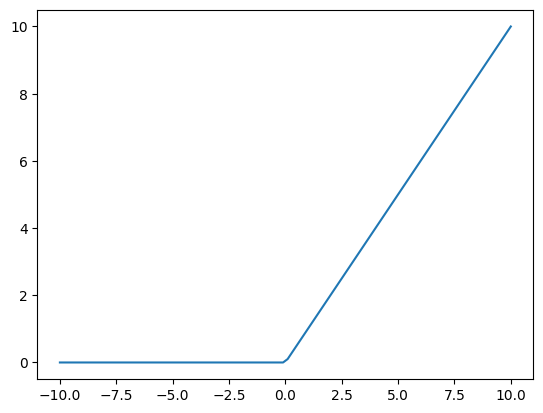

In [52]:
plt.plot(x, relu(x))
plt.show()

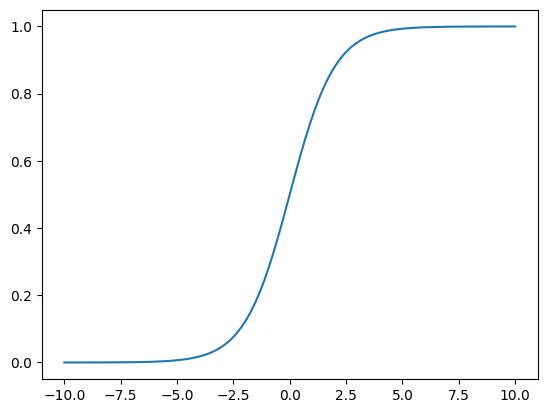

In [53]:
plt.plot(x, sigmoid(x))
plt.show()

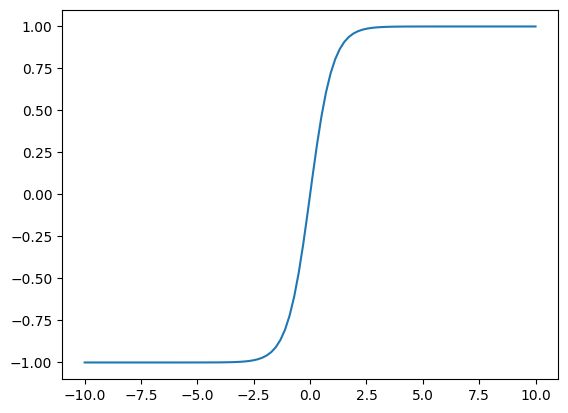

In [54]:
plt.plot(x, tanh(x))
plt.show()

tensor(1.0000)


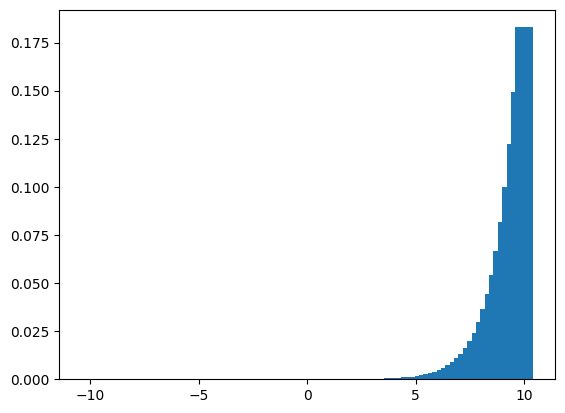

In [55]:
y = softmax(x)
print(y.sum())
plt.bar(x, y)
plt.show()

In [60]:
# inputs
torch.manual_seed(42)
inputs = torch.tensor([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 3.1, 1.1, 2.7],
]) # size (2, 4)

# random weights and biases
W1 = torch.randn((4, 5))
b1 = torch.randn(5)
W2 = torch.randn((5, 3))
b2 = torch.randn(3)
W3 = torch.randn((3, 2))
b3 = torch.randn(2)

h1_preact = inputs @ W1 + b1
h1_out = tanh(h1_preact)

h2_preact = h1_out @ W2 + b2
h2_out = tanh(h2_preact)

logits = h2_out @ W3 + b3
outputs = softmax(logits)

print(outputs)

tensor([[0.5320, 0.7280],
        [0.4273, 0.3353]])


### Encapsulating with classes

In [35]:
class Module:
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)


class Linear(Module):
    def __init__(self, in_features, out_features, bias = True):
        self.W = torch.randn((in_features, out_features))
        self.b = torch.randn(out_features)


    def forward(self, x):
        return x @ self.W + self.b
    
    def parameters(self):
        return [self.W, self.b]

In [ ]:
class ReLU(Module):
    def forward(self, x):
        return torch.maximum(x, torch.zeros_like(x))
    
class Sigmoid(Module):
    def forward(self, x):
        return 1 / (1 + torch.exp(-x))

class Tanh(Module):
    def forward(self, x):
        return (torch.exp(2*x)-1) / (torch.exp(2*x)+1)
    
class Softmax(Module):
    def forward(self, x):
        return torch.exp(x) / torch.exp(x).sum(dim=-1)

In [39]:
class FNN(Module):
    def __init__(self):
        self.lin1 = Linear(4, 5)
        self.act1 = Tanh()
        self.lin2 = Linear(5, 3)
        self.act2 = Tanh()
        self.lin3 = Linear(3, 2)
    
    def forward(self, x):
        h1_preact = self.lin1(x)
        h1_out = self.act1(h1_preact)
        h2_preact = self.lin2(h1_out)
        h2_out = self.act2(h2_preact)
        logits = self.lin3(h2_out)
        return logits
    
    def parameters(self):
        return [self.lin1.parameters, self.lin2.parameters, self.lin3.parameters]

In [63]:
torch.manual_seed(42)

# inputs
inputs = torch.tensor([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 3.1, 1.1, 2.7],
]) # size (2, 4)

model = FNN()
logits = model(inputs)
outputs = softmax(logits)

print(outputs)

tensor([[0.5320, 0.7280],
        [0.4273, 0.3353]])
